In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from keras.datasets import fashion_mnist
from keras.utils import np_utils, plot_model

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
df = pd.read_csv(url)

In [4]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
df.shape

(2035, 8)

In [6]:
cost_close1 = df['Close']
cost_close = np.array(cost_close1).reshape(-1, 1)
cost_close

array([[233.75],
       [233.25],
       [234.25],
       ...,
       [120.65],
       [120.9 ],
       [121.55]])

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
data = scaler.fit_transform(cost_close)

In [8]:
train_size = int(len(data) * 0.7)
test_size = len(data) - train_size
train, test = data[0:train_size,:], data[train_size:len(data),:]
print("{} - {}".format(len(train), test.shape) )

1424 - (611, 1)


In [9]:
test_g = np.empty_like(data)
test_g[:, :] = np.nan
test_g[len(train):len(data), :] = test

In [10]:
data.shape

(2035, 1)

<function matplotlib.pyplot.show>

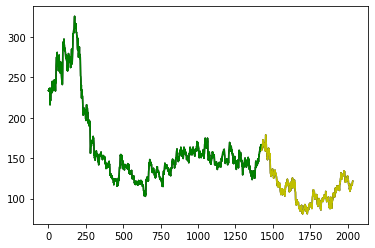

In [12]:
plt.plot(scaler.inverse_transform(data), color = 'black')
plt.plot(scaler.inverse_transform(train), color = 'g')
plt.plot(scaler.inverse_transform(test_g), color = 'y')
plt.show

In [ ]:
train

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.32618464],
       [0.32271242],
       [0.3247549 ]])

In [15]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [16]:
look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

In [17]:
X_train.shape

(1422, 1)

In [18]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

##Модель

In [19]:
model = keras.Sequential(
    [
        layers.LSTM(50, return_sequences = True, input_shape=(1, 1)),
        layers.Dropout(0.25),
        
        layers.LSTM(50, return_sequences = True),
        layers.Dropout(0.25),

        layers.LSTM(50, return_sequences = True),
        layers.Dropout(0.25),

        layers.Dense(1),
    ]
)

In [20]:
model.compile(loss='mean_squared_error', 
               optimizer='adam', 
              )

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 50)             10400     
_________________________________________________________________
dropout (Dropout)            (None, 1, 50)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 50)             20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 50)             20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
dense (Dense)                (None, 1, 1)              5

In [24]:
model.fit(X_train, y_train, epochs = 10, batch_size = 10, verbose = 1)

Epoch 1/10
143/143 [==============================] - 1s 6ms/step - loss: 0.0012
Epoch 2/10
143/143 [==============================] - 1s 6ms/step - loss: 0.0011
Epoch 3/10
143/143 [==============================] - 1s 6ms/step - loss: 9.6515e-04
Epoch 4/10
143/143 [==============================] - 1s 6ms/step - loss: 0.0011
Epoch 5/10
143/143 [==============================] - 1s 6ms/step - loss: 0.0011
Epoch 6/10
143/143 [==============================] - 1s 6ms/step - loss: 0.0011
Epoch 7/10
143/143 [==============================] - 1s 6ms/step - loss: 0.0011
Epoch 8/10
143/143 [==============================] - 1s 6ms/step - loss: 0.0011
Epoch 9/10
143/143 [==============================] - 1s 6ms/step - loss: 9.9611e-04
Epoch 10/10
143/143 [==============================] - 1s 6ms/step - loss: 0.0011


In [25]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = predicted_stock_price.reshape(-1, 1)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

real_stock_price = y_test
real_stock_price = real_stock_price.reshape(-1,1)
real_stock_price = scaler.inverse_transform(real_stock_price)

In [26]:
real_stock_price_ptl = np.empty_like(data)
real_stock_price_ptl[:,:] = np.nan
real_stock_price_ptl[len(train):len(data) - look_back - 1, :] = real_stock_price

predicted_stock_price_ptl = np.empty_like(data)
predicted_stock_price_ptl[:,:] = np.nan
predicted_stock_price_ptl[len(train):len(data) - look_back - 1, :] = predicted_stock_price


**График вместе с тренеровачными данными**

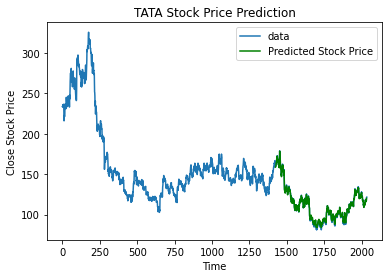

In [27]:
plt.plot(scaler.inverse_transform(data), label='data')
#plt.plot(real_stock_price_ptl, color = 'black', label = 'Real Stock Price')
plt.plot(predicted_stock_price_ptl, color = 'green', label = 'Predicted Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Close Stock Price')
plt.legend()
plt.show()

**График тестовых и предик**

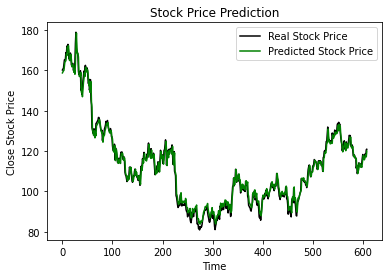

In [28]:
plt.plot(real_stock_price, color = 'black', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Close Stock Price')
plt.legend()
plt.show()

In [ ]:


#y_t = scaler.inverse_transform(y_train)


array([[0.62214052],
       [0.62622549],
       [0.63378268],
       ...,
       [0.3500817 ],
       [0.32618464],
       [0.32271242]])

In [ ]:
from sklearn.metrics import mean_squared_error
import math


predicted_stock_price_t = model.predict(X_train)
predicted_stock_price_t = predicted_stock_price_t.reshape(-1, 1)
predicted_stock_price_t = scaler.inverse_transform(predicted_stock_price_t)

trainScore = math.sqrt(mean_squared_error(y_train, predicted_stock_price_t))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test, predicted_stock_price))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 173.58 RMSE
Test Score: 117.67 RMSE
